In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from typing import Union
from pathlib import Path
from pprint import pprint

In [71]:
def read_mesa_file(file: Union[Path, str]):
    """A simple file reader that can read a mesa .data file or a .mod model file.
    It returns all the values inside those files as an dictionary. If values
    are part of a table, they will be arrays.
    
    Inputs: A file path
    """
    if isinstance(file, str):
        file = Path(file)
    dic = {}
    with file.open('r') as fil:
        if file.suffix == ".mod":
            fil.readline()
            fil.readline()
            fil.readline()
            fil.readline()
            line = fil.readline().split()
            while len(line) > 0:
                # print(line)
                if line[1].count("'") > 0:  # Strings
                    dic[line[0]] = line[1]
                elif line[1].count('.') == 1:  # Floats, D or E
                    dic[line[0]] = float(line[1].replace('D', 'E'))
                elif line[1].isdigit():  # Ints
                    dic[line[0]] = line[1]
                line = fil.readline().split()
            keys = ["i"] + fil.readline().split()
        elif file.suffix == ".data":
                
            fil.readline()
            keys = fil.readline().split()
            vals = fil.readline().split()
            for k, v in zip(keys, vals):
                if v.count(".") == 1:
                    dic[k] = float(v)
                    if k == "Teff":
                        print(k, float(v), dic["Teff"])
                elif v.isdigit():
                    dic[k] = int(v)
                elif v.count(".") == 2:
                    dic[k] = v
                else:
                    dic[k] = None
            fil.readline()
            fil.readline()
            keys = fil.readline().split()
        # print(keys)
        line = fil.readline()
        while len(line.split()) > 0:
            for i, v in enumerate(line.split()):
                if v.count(".") == 1:
                    if keys[i] in dic.keys():
                        dic[keys[i]].append(float(v.replace('D', 'E')))
                    else:
                        dic[keys[i]] = [float(v.replace('D', 'E'))]
                elif v.isdigit():
                    if keys[i] in dic.keys():
                        dic[keys[i]].append(int(v))
                    else:
                        dic[keys[i]] = [int(v)]
                elif v.count(".") == 2:
                    if keys[i] in dic.keys():
                        dic[keys[i]].append(v)
                    else:
                        dic[keys[i]] = [v]
                else:
                    if keys[i] in dic.keys():
                        dic[keys[i]].append(None)
                    else:
                        dic[keys[i]] = [None]
                    keys[i]
            line = fil.readline()
        for key, item in dic.items():
            if isinstance(item, list):
                dic[key] = np.array(item)
    return dic

In [80]:
def planck(lamda, Teff):
    lhs = 2 * 6.626e-34 * 2.9979e8 * 2.9979e8 / lamda**5
    exp = 6.626e-34 * 2.9979e8 / lamda / 1.3806e-23 / Teff
    result = lhs / (np.exp(exp) - 1)
    return result

def color_temp(Teff):
    lamdas = np.arange(300, 800, 10) * 1e-9
    fluxes = planck(lamdas, Teff)
    blue = np.sum(fluxes[(lamdas > 400e-9) & (lamdas < 490e-9)])
    green = np.sum(fluxes[(lamdas > 485e-9) & (lamdas < 570e-9)])
    red = np.sum(fluxes[(lamdas > 565e-9) & (lamdas < 660e-9)])
    color = np.array([red, green, blue])
    color = color / np.max(color)
    return color

In [81]:
here = Path()
print(here.absolute())
models = []
for fil in here.glob("*final_model*.mod"):
    models.append(read_mesa_file(fil))
# pprint(models)
mdl = read_mesa_file(fil)
pprint(mdl.keys())

/home/dgatlin/Documents/2022/astr_565/assignment_16.1
dict_keys(['version_number', 'M/Msun', 'model_number', 'star_age', 'initial_z', 'n_shells', 'net_name', 'species', 'Teff', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_z_burn', 'power_photo', 'total_energy', 'cumulative_energy_error', 'cumulative_error/total_energy', 'num_retries', 'i', 'lnd', 'lnT', 'lnR', 'L', 'dq', 'mlt_vc', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24'])


15130.734819217632


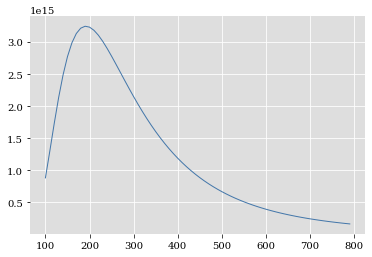

In [82]:
ws = np.arange(100, 800, 10) * 1e-9
flx = planck(ws, mdl["Teff"])
plt.plot(ws * 1e9, flx)
print(mdl["Teff"])

In [83]:
2.8977e6 / mdl["Teff"]

191.51085751100567

[0.32434958 0.48576493 1.        ]
[0.36926823 0.52507401 1.        ]
[1.         0.93496345 0.96668886]
[1.         0.78708488 0.64078835]
[0.60060195 0.70220229 1.        ]
[0.31723231 0.47934985 1.        ]
[0.44129004 0.58428367 1.        ]
[0.34929429 0.5078393  1.        ]
[0.74575308 0.79816451 1.        ]
[0.33477694 0.49506893 1.        ]
[1.         0.68036978 0.4542549 ]
[0.50475973 0.63316229 1.        ]
[0.96948208 0.93117912 1.        ]
[1.         0.668642   0.43607111]
[0.86549039 0.87125697 1.        ]
[1.         0.70577697 0.49518722]
[0.39850738 0.54964071 1.        ]


Text(1, 0, '')

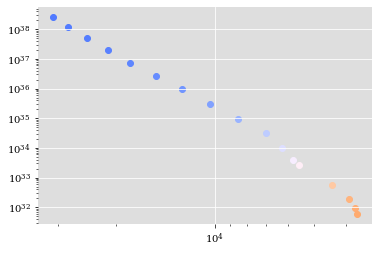

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for model in models:
    ax.scatter(model["Teff"], model["L"].max(), color=color_temp(model["Teff"]))
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()
ax.set_xlabel(r"")

In [78]:
np.exp(mdl["lnT"]).min()

15178.65370686984

In [79]:
mdl["M/Msun"]

4.93